In [54]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, TimeDistributed
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

DỰ ĐOÁN TÍN HIỆU ECG

In [55]:
# Đọc file CSV vào DataFrame
df = pd.read_csv('../File CSV/MIT-BIH/208_MLII.csv', header=None)
data=df.drop(columns=187)
data=data.values

In [56]:
train_size = 0.8
test_size = 1 - train_size

# Tính số lượng dòng cho tập train
num_train_samples = int(len(data) * train_size)

# Chia dữ liệu thành tập train và tập test
train_data = data[:num_train_samples]
test_data = data[num_train_samples:]

In [57]:
#Chia khung
window_input= 40
window_out=240

In [58]:
# Số lượng lặp qua dữ liệu
num_samples_train = len(train_data) - window_input - window_out + 1
num_samples_test = len(test_data) - window_input - window_out + 1

# Đối với tập train
# Tạo dữ liệu train từ cửa sổ trượt
X_train, y_train, X_test, y_test = [], [], [], []

for i in range(num_samples_train):
    X_window = data[i:i+window_input]
    y_window = data[i+window_input:i+window_input+window_out]

    X_train.append(X_window)
    y_train.append(y_window)



In [59]:
# Đối với tập test
for i in range(num_samples_test):
    X_window = data[i:i+window_input]
    y_window = data[i+window_input:i+window_input+window_out]

    X_test.append(X_window)
    y_test.append(y_window)

In [60]:
X_train= np.array(X_train)
y_train= np.array(y_train)
X_test= np.array(X_test)
y_test= np.array(y_test)

In [61]:
# Tạo một mô hình LSTM
model = Sequential()
model.add(LSTM(64,activation='relu' ,input_shape=(40, 187)))  # Đặt input_shape phù hợp với kích thước của mảng X_train
model.add(Dense(240 * 187))  # Đặt lớp Dense phù hợp với kích thước của mảng y_train
# Biên dịch mô hình
model.compile(optimizer='adam', loss='mean_squared_error')

In [62]:
model.fit(X_train, y_train.reshape(-1, 240 * 187), epochs=64, batch_size=16)

Epoch 1/64
77/77 [==============================] - 13s 103ms/step - loss: 0.0375
Epoch 2/64
77/77 [==============================] - 8s 98ms/step - loss: 0.0225
Epoch 3/64
77/77 [==============================] - 6s 78ms/step - loss: 0.0222
Epoch 4/64
77/77 [==============================] - 8s 111ms/step - loss: 0.0219
Epoch 5/64
77/77 [==============================] - 9s 113ms/step - loss: 0.0218
Epoch 6/64
77/77 [==============================] - 7s 87ms/step - loss: 0.0217
Epoch 7/64
77/77 [==============================] - 6s 74ms/step - loss: 0.0216
Epoch 8/64
77/77 [==============================] - 5s 71ms/step - loss: 0.0215
Epoch 9/64
77/77 [==============================] - 6s 74ms/step - loss: 0.0215
Epoch 10/64
77/77 [==============================] - 5s 64ms/step - loss: 0.0214
Epoch 11/64
77/77 [==============================] - 5s 70ms/step - loss: 0.0214
Epoch 12/64
77/77 [==============================] - 5s 62ms/step - loss: 0.0213
Epoch 13/64
77/77 [==============

In [63]:
# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)


3/3 [==============================] - 0s 14ms/step


In [64]:
from sklearn.metrics import mean_squared_error, r2_score
# Độ đo Mean Squared Error (MSE)
mse = mean_squared_error(y_test.reshape(-1, 240 * 187), y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Độ đo R-squared (R2)
r2 = r2_score(y_test.reshape(-1, 240 * 187), y_pred)
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 0.022204002566108723
R-squared (R2): 0.007580613586238858


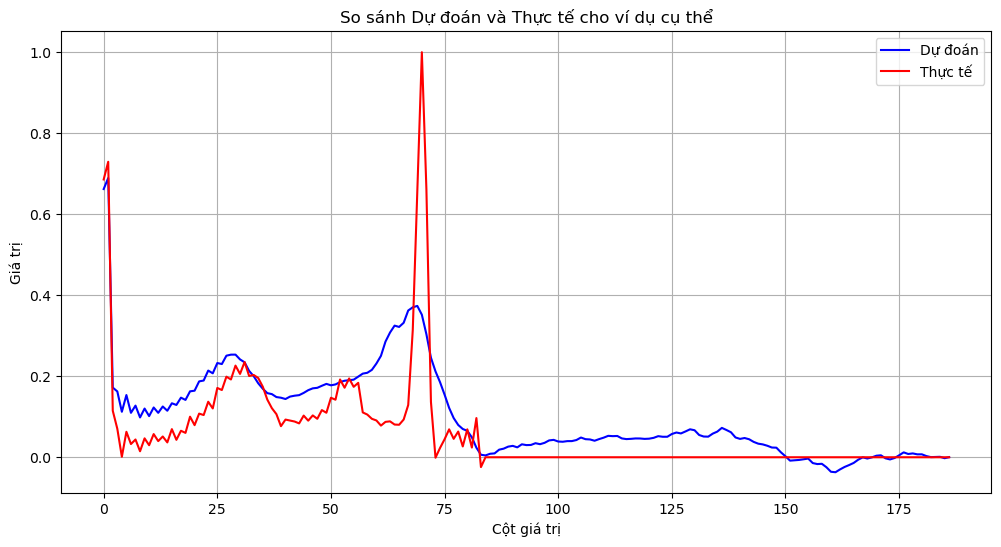

In [65]:
import matplotlib.pyplot as plt

# Chọn một ví dụ cụ thể để trực quan hóa
example_index = 3  # Thay đổi chỉ số ví dụ nếu cần

# Lấy giá trị dự đoán và giá trị thực tế tương ứng
y_pred_example = y_pred[example_index].reshape(240, 187)
y_test_example = y_test[example_index].reshape(240, 187)

# Vẽ biểu đồ cho giá trị dự đoán (màu xanh) và giá trị thực tế (màu đỏ)
plt.figure(figsize=(12, 6))
plt.plot(y_pred_example[0], label='Dự đoán', color='blue')
plt.plot(y_test_example[0], label='Thực tế', color='red')
plt.xlabel('Cột giá trị')
plt.ylabel('Giá trị')
plt.title('So sánh Dự đoán và Thực tế cho ví dụ cụ thể')
plt.legend()
plt.grid()
plt.show()


PHÂN LỚP TÍN HIỆU ECG TƯƠNG LAI

In [66]:
# Đọc file CSV vào DataFrame
data2=df.values

In [67]:
train_size = 0.8
test_size = 1 - train_size

# Tính số lượng dòng cho tập train
num_train_samples = int(len(data2) * train_size)

# Chia dữ liệu thành tập train và tập test
train_data2 = data2[:num_train_samples]
test_data2 = data2[num_train_samples:]

In [68]:
X_train_class= data2[:,:-1]
y_train_class= data2[:,-1].astype(int)

In [69]:
num_samples_test2 = len(test_data2) - window_input - window_out + 1
X_test2, y_test2 = [], []
# Đối với tập test
for i in range(num_samples_test2):
    X_window = data2[i:i+window_input]
    y_window = data2[i+window_input:i+window_input+window_out]

    X_test2.append(X_window)
    y_test2.append(y_window)

In [70]:
y_test2=np.array(y_test2)

In [71]:
y_test2.shape


(96, 240, 188)

In [72]:
y_test2= np.array(y_test2)
y_test2=y_test2.reshape(y_test2.shape[0]*240,188)

In [73]:
#y_test
y_test_class=y_test2[:,-1].astype(int)

In [74]:
np.unique(y_test_class)

array([0, 2, 3])

In [75]:
#Dữ liệu dự đoán (X_test)
X_predict=y_pred.astype(float)

In [76]:
X_predict_test=X_predict.reshape(y_test2.shape[0],187)

In [77]:
print(X_train_class.shape)
print(y_train_class.shape)
print(X_predict_test.shape)
print(y_test_class.shape)

(1875, 187)
(1875,)
(23040, 187)
(23040,)


In [78]:
np.unique(y_train_class)

array([0, 1, 2, 3])

Bagging

In [80]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
# Khởi tạo mô hình KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)  # Tuỳ chỉnh số hàng xóm nếu cần
knn_model.fit(X_train_class, y_train_class)

# Bước 1: Xây dựng mô hình Bagging
n_estimators = 10  # Số lượng mô hình KNeighborsClassifier trong ensemble (có thể điều chỉnh)
bagging_model = BaggingClassifier(base_estimator=knn_model, n_estimators=n_estimators, random_state=42)

# Đào tạo mô hình Bagging trên dữ liệu huấn luyện
bagging_model.fit(X_train_class, y_train_class)

# Dự đoán với mô hình Bagging
predictions = bagging_model.predict(X_predict_test)

# Đánh giá hiệu suất
accuracy = accuracy_score(y_test_class, predictions)
print("Accuracy:", accuracy)

c:\Users\ASUS\anaconda3\envs\KTDL\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.7300347222222222


Boosting

KNN-XGBoost

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# Khởi tạo mô hình KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)

# Khởi tạo mô hình XGBClassifier với mô hình KNeighborsClassifier làm mô hình cơ bản
xgb_model = XGBClassifier(base_estimator=knn_model, random_state=42)

# Đào tạo mô hình XGBoost trên dữ liệu huấn luyện
xgb_model.fit(X_train_class, y_train_class)

# Dự đoán với mô hình XGBoost
predictions = xgb_model.predict(X_predict_test)

accuracy = accuracy_score(y_test_class, predictions)
accuracy

[22:13:19] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "base_estimator" } are not used.



0.8166204986149584

KNN-LightGBM

In [26]:
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgb

# Khởi tạo mô hình KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)  # Tuỳ chỉnh số hàng xóm nếu cần
knn_model.fit(X_train_class, y_train_class)

# Bước 1: Xây dựng mô hình LightGBM
n_estimators = 100  # Số lượng cây trong ensemble (có thể điều chỉnh)
learning_rate = 0.1  # Tốc độ học (có thể điều chỉnh)
lightgbm_model = lgb.LGBMClassifier(n_estimators=n_estimators, learning_rate=learning_rate, random_state=42)

# Đào tạo mô hình LightGBM trên dữ liệu huấn luyện
lightgbm_model.fit(X_train_class, y_train_class)

# Dự đoán với mô hình LightGBM
predictions = lightgbm_model.predict(X_predict_test)

# Đánh giá hiệu suất
accuracy = accuracy_score(y_test_class, predictions)
print("Accuracy:", accuracy)


Accuracy: 0.821606648199446


Stacking

KNN-Catboost

In [81]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier


# Khởi tạo mô hình KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)

# Khởi tạo mô hình RandomForestClassifier hoặc mô hình boosting khác (ví dụ: GradientBoostingClassifier)
catboost_model = CatBoostClassifier(random_seed=42)

# Tạo mô hình StackingClassifier kết hợp KNeighborsClassifier và mô hình boosting
stacking_model = StackingClassifier(
    classifiers=[knn_model, catboost_model],
    meta_classifier=RandomForestClassifier(random_state=42)
)

# Đào tạo mô hình stacking trên dữ liệu huấn luyện
stacking_model.fit(X_train_class, y_train_class)

# Dự đoán với mô hình stacking
predictions = stacking_model.predict(X_predict_test)


Learning rate set to 0.081705
0:	learn: 1.2141368	total: 485ms	remaining: 8m 4s
1:	learn: 1.0837606	total: 707ms	remaining: 5m 53s
2:	learn: 0.9776210	total: 974ms	remaining: 5m 23s
3:	learn: 0.8891871	total: 1.25s	remaining: 5m 12s
4:	learn: 0.8132177	total: 1.51s	remaining: 5m 1s
5:	learn: 0.7487598	total: 1.72s	remaining: 4m 44s
6:	learn: 0.6915304	total: 1.97s	remaining: 4m 39s
7:	learn: 0.6440231	total: 2.17s	remaining: 4m 29s
8:	learn: 0.6020347	total: 2.46s	remaining: 4m 30s
9:	learn: 0.5643434	total: 2.64s	remaining: 4m 21s
10:	learn: 0.5313648	total: 2.85s	remaining: 4m 15s
11:	learn: 0.5008015	total: 3.08s	remaining: 4m 13s
12:	learn: 0.4705179	total: 3.31s	remaining: 4m 11s
13:	learn: 0.4456626	total: 3.57s	remaining: 4m 11s
14:	learn: 0.4224662	total: 3.7s	remaining: 4m 3s
15:	learn: 0.4032878	total: 3.92s	remaining: 4m
16:	learn: 0.3842499	total: 4.16s	remaining: 4m
17:	learn: 0.3663528	total: 4.38s	remaining: 3m 58s
18:	learn: 0.3479496	total: 4.55s	remaining: 3m 55s
19:	

In [82]:
accuracy = accuracy_score(y_test_class, predictions)
accuracy

0.7300347222222222

KNN-SGD

In [100]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.model_selection import train_test_split

# Khởi tạo mô hình KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)

# Khởi tạo mô hình SGDClassifier
sgd_model = SGDClassifier(loss='log', random_state=42)  # Điều chỉnh các tham số khác tùy theo nhu cầu

# Tạo mô hình StackingClassifier kết hợp KNeighborsClassifier và SGDClassifier
stacking_model = StackingClassifier(
    classifiers=[knn_model, sgd_model],
    meta_classifier=knn_model
)

# Đào tạo mô hình stacking trên dữ liệu huấn luyện
stacking_model.fit(X_train_class, y_train_class)

# Dự đoán với mô hình stacking
predictions = stacking_model.predict(X_predict_test)


accuracy = accuracy_score(y_test_class, predictions)
accuracy

c:\Users\ASUS\anaconda3\envs\KTDL\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


0.8077562326869806

KNN-XGBoost

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from mlxtend.classifier import StackingClassifier

# Khởi tạo mô hình KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)  # Tuỳ chỉnh số hàng xóm nếu cần
knn_model.fit(X_train_class, y_train_class)

# Khởi tạo mô hình XGBoost
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)

# Bước 1: Xây dựng mô hình stacking
stacking_model = StackingClassifier(
    classifiers=[knn_model, xgb_model],  # Thêm các mô hình cơ bản vào đây nếu cần
    meta_classifier=LogisticRegression(random_state=42),
)

# Đào tạo mô hình stacking trên dữ liệu huấn luyện
stacking_model.fit(X_train_class, y_train_class)

# Dự đoán với mô hình stacking
predictions = stacking_model.predict(X_predict_test)

# Đánh giá hiệu suất
accuracy = accuracy_score(y_test_class, predictions)
print("Accuracy:", accuracy)


Accuracy: 0.7800554016620499


KNN-LightGBM

In [42]:
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier

# Khởi tạo mô hình KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)

# Khởi tạo mô hình LGBMClassifier
lgbm_model = LGBMClassifier(boosting_type='gbdt', tree_learner='voting', random_state=42)

# Khởi tạo mô hình stacking bằng cách kết hợp KNN và LightGBM
stacking_model = StackingClassifier(estimators=[('knn', knn_model), ('lgbm', lgbm_model)],
                                    final_estimator=LGBMClassifier(), stack_method='auto')

# Đào tạo mô hình stacking trên dữ liệu huấn luyện
stacking_model.fit(X_train_class, y_train_class)

# Dự đoán với mô hình stacking
predictions = stacking_model.predict(X_predict_test)

# Đánh giá mô hình
accuracy = accuracy_score(y_test_class, predictions)
print("Accuracy:", accuracy)


c:\Users\ASUS\anaconda3\envs\KTDL\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\ASUS\anaconda3\envs\KTDL\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Accuracy: 0.8177285318559557


KNN- RF

In [43]:
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Khởi tạo mô hình KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)

# Khởi tạo mô hình RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Khởi tạo mô hình stacking bằng cách kết hợp KNN và RandomForest
stacking_model = StackingClassifier(estimators=[('knn', knn_model), ('randomforest', rf_model)],
                                    final_estimator=KNeighborsClassifier(), stack_method='auto')

# Đào tạo mô hình stacking trên dữ liệu huấn luyện
stacking_model.fit(X_train_class, y_train_class)

# Dự đoán với mô hình stacking
predictions = stacking_model.predict(X_predict_test)

# Đánh giá mô hình
accuracy = accuracy_score(y_test_class, predictions)
print("Accuracy:", accuracy)


c:\Users\ASUS\anaconda3\envs\KTDL\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\ASUS\anaconda3\envs\KTDL\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Accuracy: 0.7950138504155124


KNN-GradientBoost

In [44]:
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Khởi tạo mô hình KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)

# Khởi tạo mô hình GradientBoostingClassifier
gb_model = GradientBoostingClassifier(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3)

# Khởi tạo mô hình stacking bằng cách kết hợp KNN và Gradient Boosting
stacking_model = StackingClassifier(estimators=[('knn', knn_model), ('gb', gb_model)],
                                    final_estimator=KNeighborsClassifier(), stack_method='auto')

# Đào tạo mô hình stacking trên dữ liệu huấn luyện
stacking_model.fit(X_train_class, y_train_class)

# Dự đoán với mô hình stacking
predictions = stacking_model.predict(X_predict_test)

# Đánh giá mô hình
accuracy = accuracy_score(y_test_class, predictions)
print("Accuracy:", accuracy)


c:\Users\ASUS\anaconda3\envs\KTDL\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\ASUS\anaconda3\envs\KTDL\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Accuracy: 0.7994459833795013


KNN-AdaBoost

In [45]:
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Khởi tạo mô hình KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)

# Khởi tạo mô hình AdaBoostClassifier
adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)

# Khởi tạo mô hình stacking bằng cách kết hợp KNN và AdaBoost
stacking_model = StackingClassifier(estimators=[('knn', knn_model), ('adaboost', adaboost_model)],
                                    final_estimator=AdaBoostClassifier(n_estimators=50, random_state=42), stack_method='auto')

# Đào tạo mô hình stacking trên dữ liệu huấn luyện
stacking_model.fit(X_train_class, y_train_class)

# Dự đoán với mô hình stacking
predictions = stacking_model.predict(X_predict_test)

# Đánh giá mô hình
accuracy = accuracy_score(y_test_class, predictions)
print("Accuracy:", accuracy)


c:\Users\ASUS\anaconda3\envs\KTDL\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\ASUS\anaconda3\envs\KTDL\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Accuracy: 0.7983379501385042


OPTUNA

In [83]:
import optuna
import lightgbm as lgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score

def objective_knn(trial):
    # Tối ưu hóa siêu tham số cho mô hình KNN
    n_neighbors = trial.suggest_int("n_neighbors", 1, 10)
    weights = trial.suggest_categorical("weights", ["uniform", "distance"])
    
    knn_model = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights)
    knn_model.fit(X_train_class, y_train_class)
    y_pred_knn = knn_model.predict(X_predict_test)
    accuracy_knn = accuracy_score(y_test_class, y_pred_knn)
    
    return accuracy_knn

def objective_lgbm(trial):
    # Tối ưu hóa siêu tham số cho mô hình LightGBM
    num_leaves = trial.suggest_int("num_leaves", 10, 100)
    learning_rate = trial.suggest_float("learning_rate", 0.01, 0.1)
    
    lgbm_model = lgb.LGBMClassifier(num_leaves=num_leaves, learning_rate=learning_rate)
    lgbm_model.fit(X_train_class, y_train_class)
    y_pred_lgbm = lgbm_model.predict(X_predict_test)
    accuracy_lgbm = accuracy_score(y_test_class, y_pred_lgbm)
    
    return accuracy_lgbm

# Tạo một đối tượng Study cho KNN
study_knn = optuna.create_study(direction="maximize")
study_knn.optimize(objective_knn, n_trials=50)

# Lấy ra giá trị siêu tham số tốt nhất cho KNN
best_params_knn = study_knn.best_params

# Tạo một đối tượng Study cho LightGBM
study_lgbm = optuna.create_study(direction="maximize")
study_lgbm.optimize(objective_lgbm, n_trials=50)

# Lấy ra giá trị siêu tham số tốt nhất cho LightGBM
best_params_lgbm = study_lgbm.best_params


[I 2023-10-11 22:28:07,766] A new study created in memory with name: no-name-e06bd0a6-8f21-45f7-8efd-af9afdc7be87


[I 2023-10-11 22:28:09,806] Trial 0 finished with value: 0.730078125 and parameters: {'n_neighbors': 2, 'weights': 'uniform'}. Best is trial 0 with value: 0.730078125.
[I 2023-10-11 22:28:10,477] Trial 1 finished with value: 0.7300347222222222 and parameters: {'n_neighbors': 3, 'weights': 'distance'}. Best is trial 0 with value: 0.730078125.
[I 2023-10-11 22:28:13,409] Trial 2 finished with value: 0.7299913194444444 and parameters: {'n_neighbors': 5, 'weights': 'uniform'}. Best is trial 0 with value: 0.730078125.
[I 2023-10-11 22:28:13,919] Trial 3 finished with value: 0.730078125 and parameters: {'n_neighbors': 4, 'weights': 'distance'}. Best is trial 0 with value: 0.730078125.
[I 2023-10-11 22:28:16,175] Trial 4 finished with value: 0.730078125 and parameters: {'n_neighbors': 1, 'weights': 'uniform'}. Best is trial 0 with value: 0.730078125.
[I 2023-10-11 22:28:16,718] Trial 5 finished with value: 0.730078125 and parameters: {'n_neighbors': 4, 'weights': 'distance'}. Best is trial 0 

In [ ]:
# Xây dựng các mô hình con với siêu tham số tốt nhất
best_knn_model = KNeighborsClassifier(**best_params_knn)
best_lgbm_model = lgb.LGBMClassifier(**best_params_lgbm)

# Xây dựng mô hình stacking
stacking_model = StackingClassifier(estimators=[('knn', best_knn_model), ('lgbm', best_lgbm_model)], final_estimator=KNeighborsClassifier())

# Huấn luyện mô hình stacking
stacking_model.fit(X_train_class, y_train_class)

# Dự đoán và đánh giá hiệu suất trên tập kiểm tra
y_pred_stacking = stacking_model.predict(X_predict_test)
accuracy_stacking = accuracy_score(y_test_class, y_pred_stacking)

print("Độ chính xác của mô hình stacking:", accuracy_stacking)

c:\Users\ASUS\anaconda3\envs\KTDL\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\ASUS\anaconda3\envs\KTDL\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Độ chính xác của mô hình stacking: 0.8116343490304709


Visualize

In [50]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_class, predictions)
cm

array([[1256,    0,  115],
       [  75,    3,    6],
       [ 168,    0,  182]], dtype=int64)

In [51]:
import numpy as np

unique_values, counts = np.unique(predictions, return_counts=True)
for value, count in zip(unique_values, counts):
    print(f"{value}: {count}")


0: 1499
2: 3
3: 303


In [52]:
from sklearn.metrics import recall_score

sensitivity_class_0 = recall_score(y_test_class == 0, predictions == 0)
sensitivity_class_1 = recall_score(y_test_class == 1, predictions == 1)
sensitivity_class_2 = recall_score(y_test_class == 2, predictions == 2)
sensitivity_class_3 = recall_score(y_test_class == 3, predictions == 3)
sensitivity_class_4 = recall_score(y_test_class == 4, predictions == 4)


c:\Users\ASUS\anaconda3\envs\KTDL\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ASUS\anaconda3\envs\KTDL\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


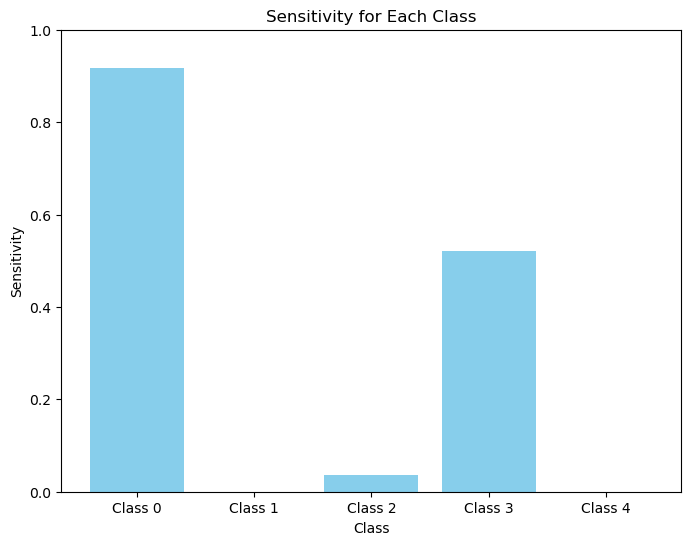

In [53]:
import matplotlib.pyplot as plt

# Sử dụng recall_score để tính sensitivity cho từng lớp
from sklearn.metrics import recall_score

# Giả sử bạn đã tính được sensitivity cho các lớp
sensitivity_scores = [sensitivity_class_0,sensitivity_class_1, sensitivity_class_2, sensitivity_class_3, sensitivity_class_4]

# Tên của các lớp
class_names = ['Class 0','Class 1', 'Class 2', 'Class 3', 'Class 4']

# Vẽ biểu đồ cột
plt.figure(figsize=(8, 6))
plt.bar(class_names, sensitivity_scores, color='skyblue')
plt.title('Sensitivity for Each Class')
plt.xlabel('Class')
plt.ylabel('Sensitivity')
plt.ylim(0, 1)  # Đặt giới hạn trục y từ 0 đến 1 để hiển thị độ nhạy từ 0% đến 100%
plt.show()
